## 🖼️ **CIFAR-10 Image Classification**

## 📌 **Introduction**
The CIFAR-10 dataset consists of **60,000 tiny color images (32x32 pixels)** across **10 object categories**, including airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.  
Image classification is a **core task in computer vision**, helping machines understand and recognize visual information.

This project focuses on:
- Building a **Basic Convolutional Neural Network (CNN)** for image classification.  
- Designing an **Enhanced CNN** with Dropout, Batch Normalization, and Data Augmentation for better generalization.  
- Comparing both models using **accuracy, precision, recall, F1-score, and confusion matrices**.  
- Visualizing **training curves and sample predictions**.

---

## 🎯 **Objectives**
- Perform **data loading and preprocessing** on CIFAR-10 images.  
- Train a **Basic CNN** and evaluate its performance.  
- Develop an **Enhanced CNN** with additional techniques for improved accuracy.  
- Compare **performance metrics** of both models.  
- Visualize **training results and predictions** for better understanding.  


-------------

### **Importing required libraries**

_run this command if you do NOT have these libraries installed_
```bash
pip install -r requirements.txt
```

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [162]:
warnings.filterwarnings('ignore') #disabling warnings

In [51]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

## **_NOTE:_** 

_The model training takes a lot of time so I'm using GPU aaceleration.For my RTX 4060, the configureations are:_
- Python 3.9
- Tensorflow 2.10.0
- CUDA 11.8
- CudNN 8.1 

In [163]:
tf.config.list_physical_devices('GPU')  #checking if tensorflow is working with GPU 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [53]:
tf.__version__

'2.10.0'

In [ ]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data() #Loading the dataset from Keras and splitting

In [ ]:
print("Train Images: ", X_train.shape) #50000 training images
print("Train Images: ", X_test.shape) #10000 testing images

Train Images:  (50000, 32, 32, 3)
Train Images:  (10000, 32, 32, 3)


In [ ]:
X_train = X_train.astype('float') /255.0 #normalising pixel values between 0 and 1
X_test = X_test.astype('float') /255.0 

In [ ]:
classes = 10
y_train = to_categorical(y_train,classes) #One hot encoding target labels
y_test = to_categorical(y_test,classes) #eg. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] = 4th label = 'cat'

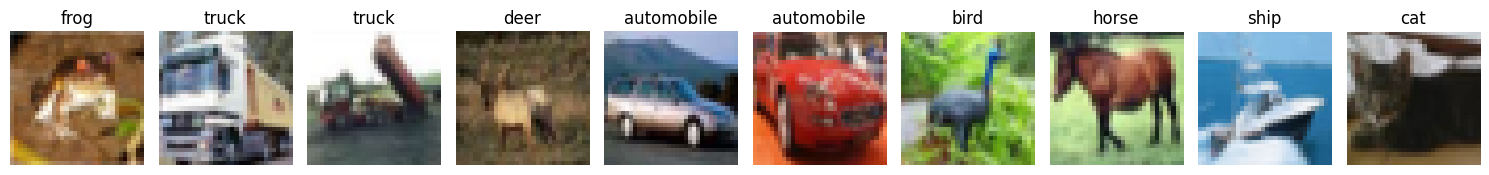

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'] #the order is fixed. changing WILL cause mislabelling 
#visualising training images with labels
plt.figure(figsize=(15,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()    
plt.show()

## **Level 1: Basic CNN**

In [59]:
model1= models.Sequential([

    #Block 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #block 2
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
]
)

In [60]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [61]:
optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [62]:
history1 = model1.fit(X_train, y_train, epochs=10, 
                    batch_size=64, 
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 7s 10ms/step - loss: 1.5688 - accuracy: 0.4275 - val_loss: 1.3217 - val_accuracy: 0.5273
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 1.1578 - accuracy: 0.5888 - val_loss: 1.0990 - val_accuracy: 0.6126
Epoch 3/10
625/625 [==============================] - 6s 9ms/step - loss: 0.9708 - accuracy: 0.6601 - val_loss: 0.9194 - val_accuracy: 0.6802
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.8484 - accuracy: 0.7022 - val_loss: 0.8802 - val_accuracy: 0.6911
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.7592 - accuracy: 0.7353 - val_loss: 0.8228 - val_accuracy: 0.7128
Epoch 6/10
625/625 [==============================] - 5s 9ms/step - loss: 0.6908 - accuracy: 0.7585 - val_loss: 0.7984 - val_accuracy: 0.7238
Epoch 7/10
625/625 [==============================] - 5s 8ms/step - loss: 0.6256 - accuracy: 0.7810 - val_loss: 0.7813 - val_accuracy: 0.7347
Epoch

## **Level 2: Advanced Model** 

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,zoom_range=0.1)
datagen.fit(X_train)

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath="best.h5", save_best_only=True, monitor='val_accuracy', mode='max')

In [69]:
from tensorflow.keras.layers import BatchNormalization, Dropout
model2= models.Sequential([

    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    layers.Conv2D(32,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    Dropout(0.25),

    
    layers.Conv2D(64,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.Conv2D(64,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    Dropout(0.3),

    layers.Conv2D(128,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.Conv2D(128,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    Dropout(0.35),

    layers.Conv2D(256,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.Conv2D(256,(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    Dropout(0.4),
    
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
]
)

In [70]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [71]:
optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [72]:
history2 = model2.fit(X_train, y_train, batch_size=64, 
                    epochs=25, 
                    validation_split=0.2,
                    callbacks=[checkpoint])

Epoch 1/25
625/625 [==============================] - 12s 17ms/step - loss: 1.6608 - accuracy: 0.4052 - val_loss: 1.4086 - val_accuracy: 0.5072
Epoch 2/25
625/625 [==============================] - 11s 17ms/step - loss: 1.2187 - accuracy: 0.5760 - val_loss: 1.1572 - val_accuracy: 0.5954
Epoch 3/25
625/625 [==============================] - 10s 17ms/step - loss: 1.0174 - accuracy: 0.6533 - val_loss: 1.1517 - val_accuracy: 0.6508
Epoch 4/25
625/625 [==============================] - 10s 16ms/step - loss: 0.8849 - accuracy: 0.7010 - val_loss: 0.9529 - val_accuracy: 0.6810
Epoch 5/25
625/625 [==============================] - 11s 18ms/step - loss: 0.7886 - accuracy: 0.7359 - val_loss: 0.7779 - val_accuracy: 0.7365
Epoch 6/25
625/625 [==============================] - 13s 21ms/step - loss: 0.7196 - accuracy: 0.7573 - val_loss: 0.6671 - val_accuracy: 0.7698
Epoch 7/25
625/625 [==============================] - 13s 20ms/step - loss: 0.6636 - accuracy: 0.7779 - val_loss: 0.6859 - val_accuracy:

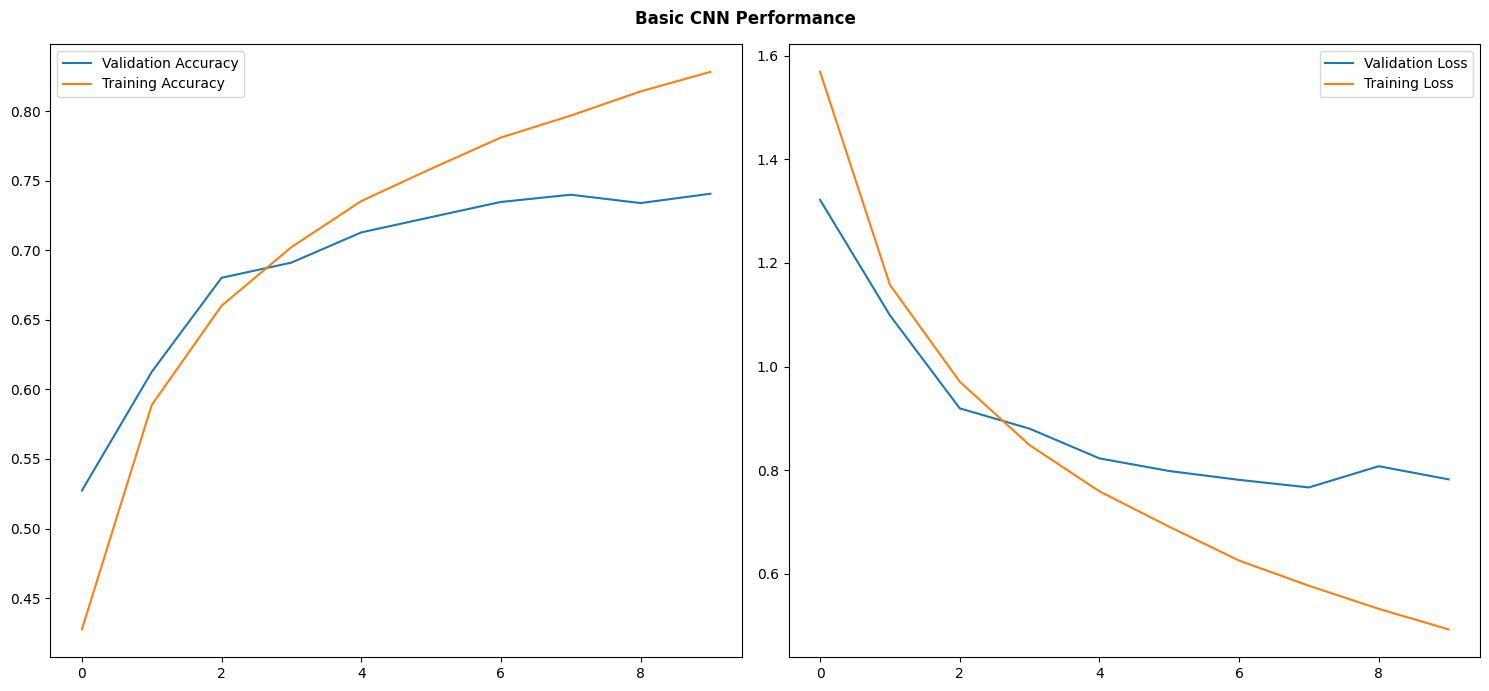

In [146]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history1.history['accuracy'], label="Training Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.plot(history1.history['loss'], label="Training Loss")
plt.suptitle("Basic CNN Performance", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

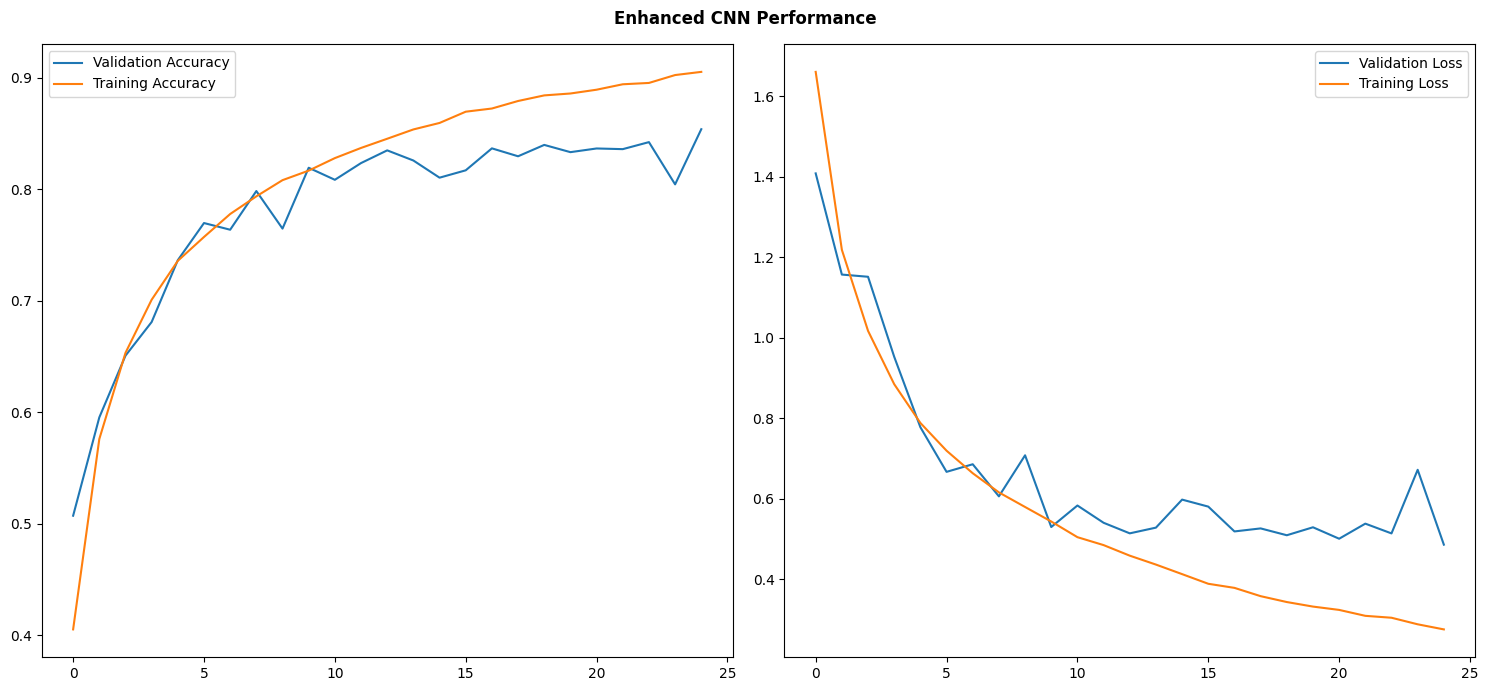

In [147]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history2.history['accuracy'], label="Training Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.plot(history2.history['loss'], label="Training Loss")
plt.suptitle("Enhanced CNN Performance", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

In [148]:
model2.load_weights("best.h5")

In [149]:
loss1, acc1= model1.evaluate(X_test, y_test)
loss2, acc2= model2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.4953 - accuracy: 0.8498


In [150]:
pred1 = model1.predict(X_test)
pred1 = np.argmax(pred1, axis=1) 

313/313 [==============================] - 1s 4ms/step


In [151]:
pred2 = model2.predict(X_test)
pred2 = np.argmax(pred2, axis=1) 

313/313 [==============================] - 2s 6ms/step


In [152]:
true_labels = [class_names[i] for i in np.argmax(y_test[:10], axis=1)]

In [153]:
pred1_labels = [class_names[i] for i in pred1[:10]]
pred2_labels = [class_names[i] for i in pred2[:10]]

In [154]:
import pandas as pd
cmp = pd.DataFrame({'True Labels': true_labels, 'Basic': pred1_labels, 'Advanced': pred2_labels})

In [155]:
cmp

,True Labels,Basic,Advanced
0,cat,dog,cat
1,ship,ship,ship
2,ship,automobile,ship
3,airplane,airplane,airplane
4,frog,frog,frog
5,frog,frog,frog
6,automobile,cat,automobile
7,frog,frog,frog
8,cat,cat,cat
9,automobile,automobile,automobile


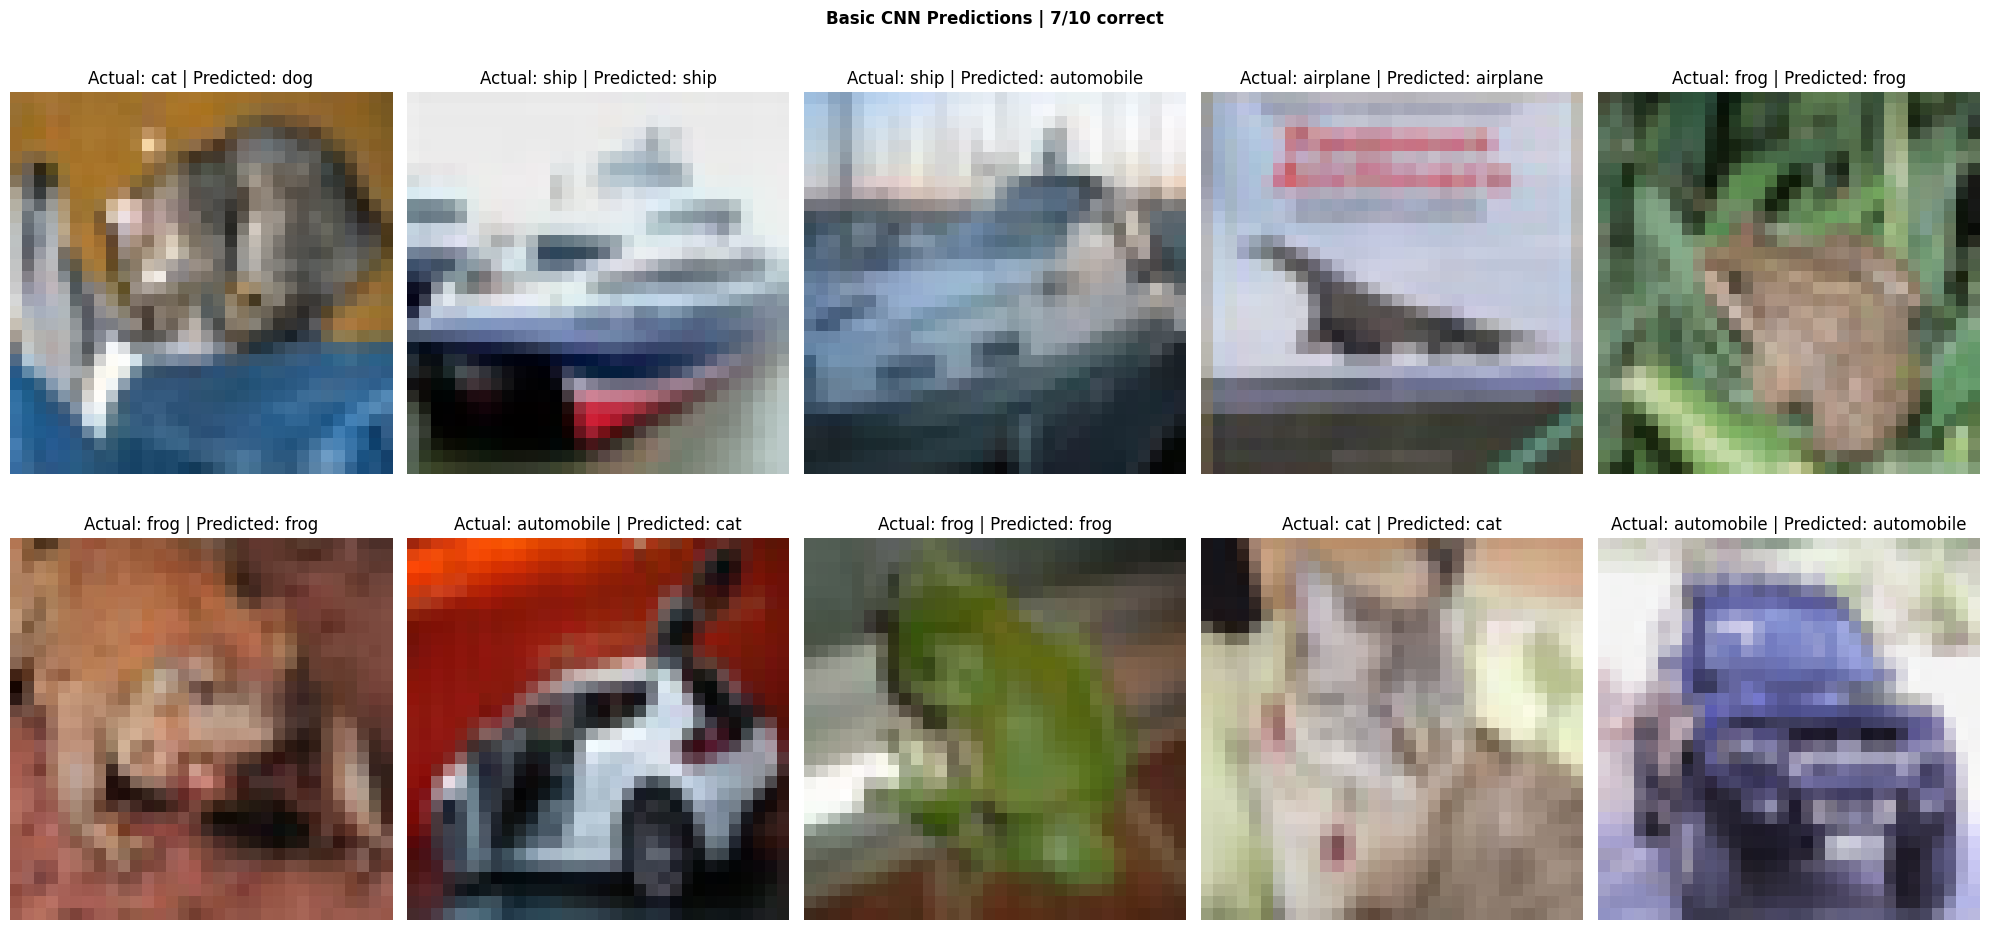

In [156]:
correct_label = [i is j for i,j in zip(pred1_labels, true_labels)].count(True)
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Actual: {true_labels[i]} | Predicted: {pred1_labels[i]}")
    plt.axis(False)

plt.suptitle(f"Basic CNN Predictions | {correct_label}/10 correct", fontweight='bold')
plt.tight_layout()
plt.show()

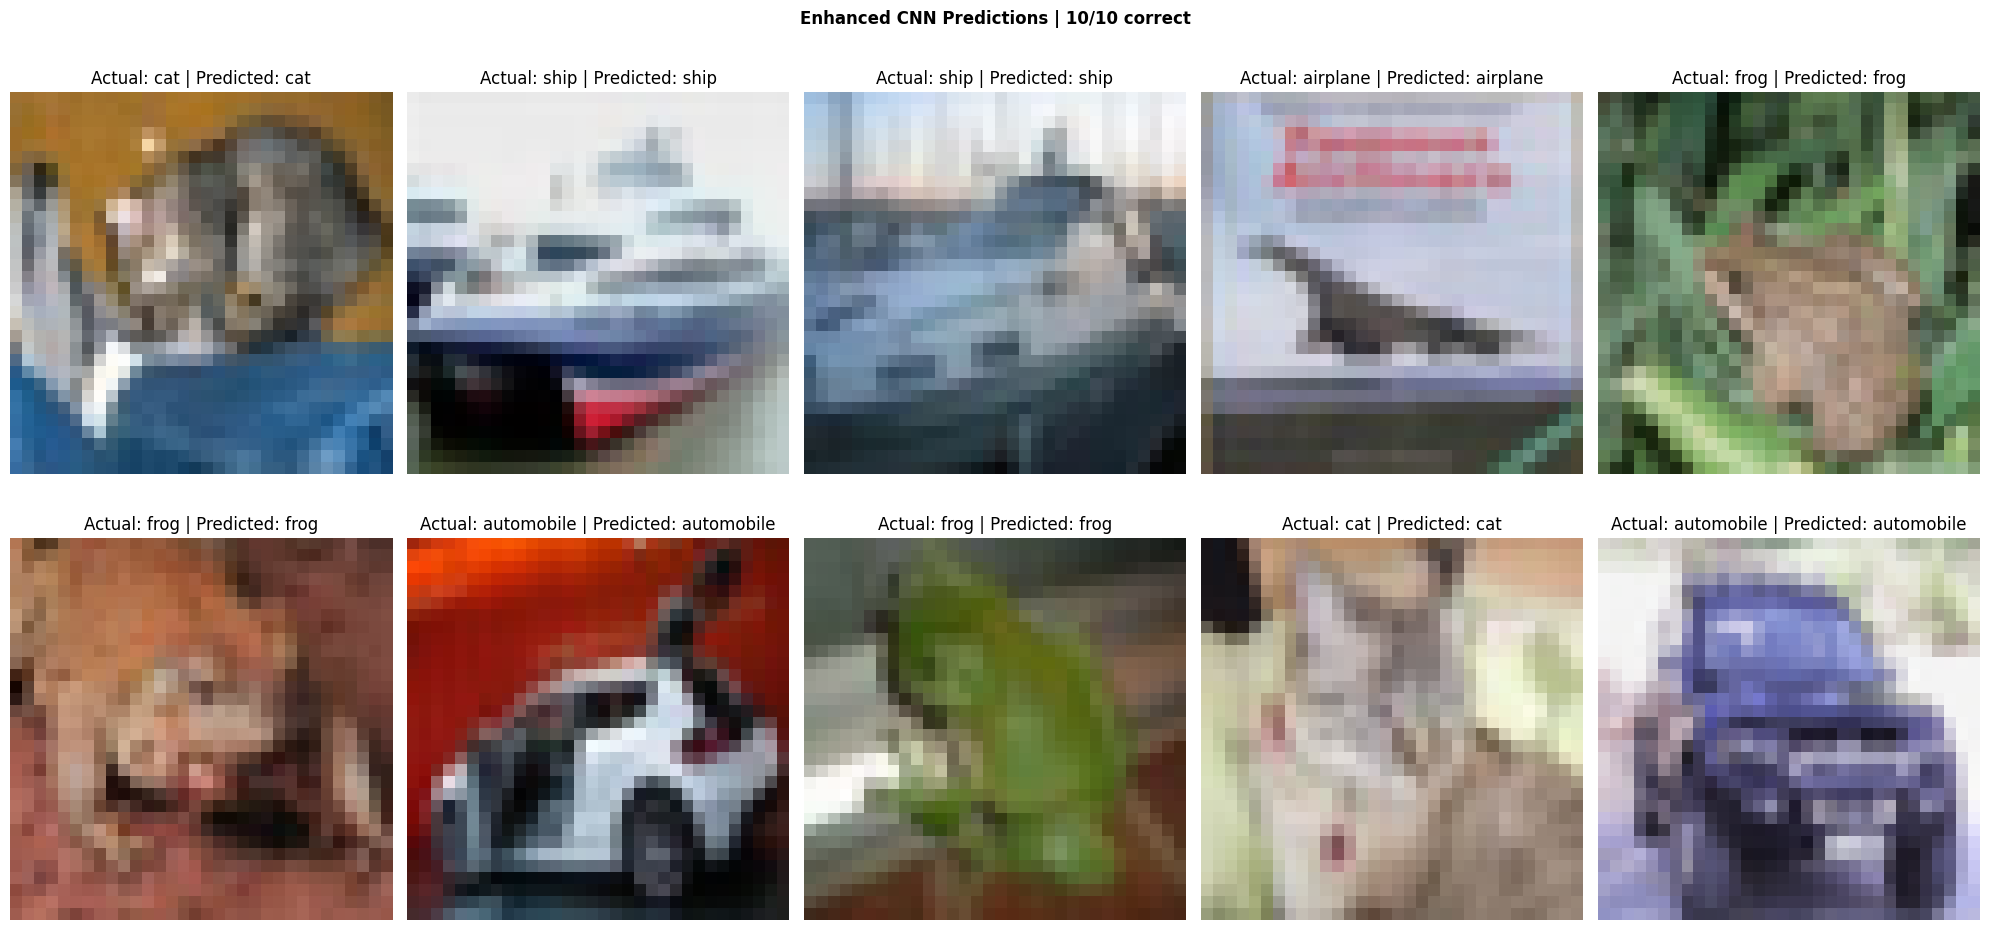

In [157]:
correct_label = [i is j for i,j in zip(pred2_labels, true_labels)].count(True)
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Actual: {true_labels[i]} | Predicted: {pred2_labels[i]}")
    plt.axis(False)

plt.suptitle(f"Enhanced CNN Predictions | {correct_label}/10 correct", fontweight='bold')
plt.tight_layout()
plt.show()

## **Testing on Real data**

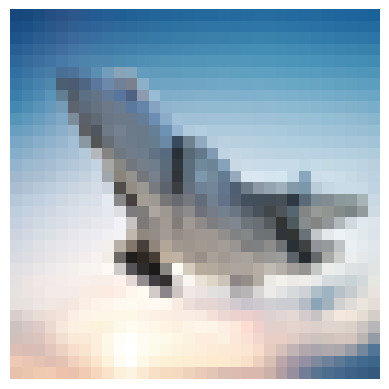

In [158]:
from PIL import Image
test = "test_data/airplane.jpg"
img = Image.open(test)
img = img.resize((32, 32))
plt.imshow(img)
plt.axis(False)
plt.show()

In [159]:
img_data = np.array(img) /255.0
img_data= np.expand_dims(img_data, axis=0)

In [160]:
pred = model1.predict(img_data)
pred_label = class_names[np.argmax(pred, axis=1)[0]]
pred_label

1/1 [==============================] - 0s 26ms/step


'airplane'

In [161]:
pred = model2.predict(img_data)
pred_label = class_names[np.argmax(pred, axis=1)[0]]
pred_label

1/1 [==============================] - 0s 31ms/step


'airplane'

*In conclusion, while a simple CNN demonstrates the core idea of deep learning in image classification, an enhanced CNN with dropout, batch normalization, and data augmentation provides a more robust and accurate solution. This highlights the importance of architectural improvements and training strategies in achieving state-of-the-art results.*